# 뉴스기사 크롤링 및 분류

## HTML이란

* HT : Hypterlink text - 문서와 문서가 링크로 연결되어 있음.
    
* M : Markdown - 태그로 이루어져 있다.
    
* L : Language

* 태그의 형식 <br>
<태그명 속성명1 = "속성값1" 속성명2='"속성값2">**컨텐츠**</태그명>


* ```html
<a href = "http://opentutorials.org">생활코딩</a>
```

* 닫히는 태그가 필요없는 경우 <태그명/>

## 선택자

* 특정 태그들에 그룹이나 번호를 주는 기능

## BeautifulSoup 패키지

In [1]:
from bs4 import BeautifulSoup

#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.

# 이 입력은 HTML 문법으로 작성되어져 있으니 HTML 문법을 기반으로 파싱
soup = BeautifulSoup(html, 'html.parser')

# 원하는 정보가 있는 위치 찾기 

soup.select('원하는 정보')  # select('원하는 정보') -->  단 하나만 있더라도, 복수 가능한 형태로 되어있음


soup.select('태그명')


soup.select('.클래스명')


soup.select('상위태그명 > 하위태그명 > 하위태그명')


soup.select('상위태그명.클래스명 > 하위태그명.클래스명')    **# 바로 아래의(자식) 태그를 선택시에는 > 기호를 사용**


soup.select('상위태그명.클래스명 하~위태그명')              **# 아래의(자손) 태그를 선택시에는   띄어쓰기 사용**


soup.select('상위태그명 > 바로아래태그명 하~위태그명')  


soup.select('.클래스명')


soup.select('#아이디명')                  # 태그는 여러개에 사용 가능하나 아이디는 한번만 사용 가능함! ==> 선택하기 좋음


soup.select('태그명.클래스명)


soup.select('#아이디명 > 태그명.클래스명)


soup.select('태그명[속성1=값1]')

In [10]:
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [4]:
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


* HTML의 요소 간에는 부모-자식 관계가 존재. 한 개의 태그 내에 포함된 태그들은 상위 태그의 자식이 된다

In [11]:
# h1태그내의 name, menu태그 찾기
# h1 >> p태그 class=name >>span태그 class=menu
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


In [12]:
# 바로 아래 자손태그가 아니므로 결과없음
print(soup.select('html > h1'))

[]


In [13]:
# 바로아래가 아닌 자손태그
soup.select('html h1')

[<h1> 장바구니
             <p class="name" id="clothes" title="라운드티"> 라운드티
                 <span class="number"> 25 </span>
 <span class="price"> 29000 </span>
 <span class="menu"> 의류</span>
 <a href="http://www.naver.com"> 바로가기 </a>
 </p>
 <p class="name" id="watch" title="시계"> 시계
                 <span class="number"> 28 </span>
 <span class="price"> 32000 </span>
 <span class="menu"> 악세서리 </span>
 <a href="http://www.facebook.com"> 바로가기 </a>
 </p>
 </h1>]

## newspaper3k 패키지

In [14]:
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language ='ko')
article.download()
article.parse()

In [15]:
# 기사제목을 출력합니다
print('기사 제목 :')
print(article.title)
print('')

# 기사 내용을 출력합니다.
print('기사 제목 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 제목 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

## 네이버뉴스기사 크롤링 (1) 뉴스URL, 페이지 이해하기

* ```https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1=100&date=20200430&page=5```

## 네이버뉴스 기사 크롤링 (2) 크롤러 만들기

In [17]:
# 크롤러 필요한 도구 import
import requests
import pandas as pd
from bs4 import BeautifulSoup

In [64]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
    urllist= []
    for i in range(1, page_num + 1):
        url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)
        headers = {'User-Agent': 'Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/54.0.2840.90 Safari/537.36'}
        news = requests.get(url, headers=headers)

        # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
        soup = BeautifulSoup(news.content, 'html.parser')

        # CASE 1
        news_list = soup.select('.newsflash_body .type06_headline li dl')
        # CASE 2
        news_list.extend(soup.select('.newsflash_body .type06 li dl'))

        # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
        for line in news_list:
            urllist.append(line.a.get('href'))
    return urllist

In [65]:
# 함수 실행
url_list = make_urllist(1, 101, 20201031)
print('뉴스기사의 갯수:', len(url_list))

뉴스기사의 갯수: 20


In [66]:
# 5개만 출력
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=056&aid=0010926497',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=022&aid=0003518608',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=015&aid=0004441305',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=277&aid=0004783335',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=014&aid=0004520569']

In [67]:
# code를 딕셔너리화
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

In [68]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
    text_list = []
    for url in urllist:
        article = Article(url, language='ko')
        article.download()
        article.parse()
        text_list.append(article.text)

#- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
    df = pd.DataFrame({'news': text_list})

#- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
    df['code'] = idx2word[str(code)]
    return df

In [69]:
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,[KBS 울산]전세 공급 부족 수준을 보여주는 울산의 '전세수급지수'가 9년여 만에...,경제
1,자료=통계청\n\n지난해 서비스업에 종사하는 임금근로자의 대출이 크게 늘고 연체율도...,경제
2,밀양시가 주최하고 비베카요가가 주관하는 '밀양아리랑 국제 VIRTUAL 요가 콘퍼런...,경제
3,[아시아경제 조강욱 기자] 이동걸 회장이 산업은행이 최근 선보인 정기예금 신상품에 ...,경제
4,신용회복위원회는 최근 포스트 코로나19 시대에 발맞춰 '금융교육 강사 비대면 워크숍...,경제
5,[파이낸셜뉴스] 던킨 도너츠와 배스킨라빈스 운용사인 던킨 브랜즈 그룹이 미국 햄버거...,경제
6,동영상 뉴스\n\n[앵커]최근 택배기사 사망이 잇따르면서 택배 회사들이 분류작업 인...,경제
7,"[KBS 춘천]강원도가 도의회에 제출한 행정사무감사 자료를 보면, 지난달(9월) 기...",경제
8,"[KBS 창원]조선업 주력인 창원과 거제, 통영, 고성군이 고용위기지역 연장을 정부...",경제
9,동영상 뉴스\n\n[앵커]새 임대차법 시행과 저금리 장기화 등으로 전셋값이 계속해서...,경제


In [70]:
data.loc[0].news

"[KBS 울산]전세 공급 부족 수준을 보여주는 울산의 '전세수급지수'가 9년여 만에 최고치를 기록했습니다.KB국민은행이 발표한 월간 주택시장 동향에 따르면 10월 전국의 전세수급지수는 191.1로, 지난달 보다 4.1포인트 상승해 19년 2개월 만에 가장 높았고, 울산은 189.9로 9년 8개월 만에 가장 높았습니다.박영하 (ha93@kbs.co.kr)"

## 네이버 뉴스 기사 크롤링 (3) 데이터 수집 & 전처리

In [71]:
code_list = [102, 103, 105]

code_list

[102, 103, 105]

In [72]:
def make_total_data(page_num, code_list, date):
    df = None

    for code in code_list:
        url_list = make_urllist(page_num, code, date)
        df_temp = make_data(url_list, code)
        print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

        if df is not None:
            df = pd.concat([df, df_temp])
        else:
            df = df_temp

    return df

In [73]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [74]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


In [75]:
df.sample(10)

,news,code
13,블랙홀을 품은 삼중성계 HR 6819 상상도 [ESO/L. Calcada 제공/ 재...,IT/과학
7,[한국경제TV 김주리 기자]\n\n지구에서 약 1천광년밖에 떨어지지 않은 곳에서 맨...,IT/과학
14,동영상 뉴스\n\n[앵커]코로나19 신규 확진자가 2명 발생해 78일 만에 최저치를...,사회
1,동영상 뉴스\n\n오늘 서쪽 지방과 동쪽 지방의 온도 차가 제법 컸습니다.서쪽 지방...,생활/문화
19,"넷플릭스와 유튜브, 페이스북 등에게 국내 이용자를 위한 ‘서비스 안정성’을 유지할 ...",IT/과학
6,[서울=뉴시스] 오동현 기자 = 펍지주식회사가 올해 첫 '플레이어언노운스 배틀그라운...,IT/과학
12,17일 오전 서울 종로경찰서에서 아동·청소년의 성보호에 관한 법률 위반 등 혐의와 ...,IT/과학
14,지난달 23일 오후 강원 춘천시청 대회의실에서 열린 제2회 강원 미래 과학 포럼에서...,IT/과학
0,[헤럴드경제=고승희 기자] 문화체육관광부는 한국문화예술위원회 7기 비상임위원으로 다...,생활/문화
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회


In [76]:
# 아래 주석처리된 코드의 주석을 해제하고 실행을 하면 대량 크롤링이 진행됩니다. 
# 위에서 수행했던 크롤링의 100배 분량이 수행될 것입니다. 한꺼번에 너무 많은 크롤링 요청이 서버에 전달되지 않도록 주의해 주세요. 
# 기사 일자를 바꿔보면서 데이터를 모으면 더욱 다양한 데이터를 얻을 수 있게 됩니다. 

df = make_total_data(30, code_list, 20201030)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [80]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  1789


In [81]:
import os

# 데이터프레임 파일을 csv로 저장
# 저장경로는 이번프로젝트를 위해 만든 폴더로 지정
csv_path = os.getenv("HOME")+"/aiffel/news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
    print('{} File Saved!'.format(csv_path))

/home/jin/aiffel/news_crawler/news_data.csv File Saved!


## 네이버 뉴스 기사 크롤링 (4)데이터 전처리

* 데이터 정제

In [1]:
import os
import pandas as pd

In [2]:
csv_path = os.getenv('HOME')+'/aiffel/news_crawler/news_data.csv'
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,"오늘(30일) 밤 8시 40분쯤, 경기도 화성시 우정읍 우정읍사무소 인근 왕복 2차...",사회
1,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회
2,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회
3,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회
4,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,사회


* 정규표현식 이용 >> 한글외의 문자 전부 제거

In [3]:
df['news']=df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]",'')
df['news']

0       오늘일밤시분쯤경기도화성시우정읍우정읍사무소인근왕복차로도로에서달리던경차와톤트럭트랙터가서...
1       기사섹션분류안내기사의섹션정보는해당언론사의분류를따르고있습니다언론사는개별기사를개이상섹션...
2       기사섹션분류안내기사의섹션정보는해당언론사의분류를따르고있습니다언론사는개별기사를개이상섹션...
3       기사섹션분류안내기사의섹션정보는해당언론사의분류를따르고있습니다언론사는개별기사를개이상섹션...
4       기사섹션분류안내기사의섹션정보는해당언론사의분류를따르고있습니다언론사는개별기사를개이상섹션...
                              ...                        
1784    애플신제품아이폰가정식출시된일오전서울강남구신사동애플가로수길매장을찾은시민들이아이폰를살펴...
1785    최근글로벌에다수의생산기지를두고있는국내주요제조대기업과보안장비계약을체결했습니다이를통해보...
1786    게임산업은기술적으로정의할때디지털액터배우를만드는산업입니다김택진사진엔씨소프트이하엔씨대표...
1787    일서울송파구에서진행된우아한청년들과민노총서비스일반노동조합의단체교섭조인식에서우아한청년들...
1788    엑스포츠뉴스최지영기자아이온이월일오픈예정인클래식서버에대한정보를공개했다일엔씨소프트대표김...
Name: news, Length: 1789, dtype: object

In [4]:
# 데이터에 Null 있나 확인
print(df.isnull().sum())


news    0
code    0
dtype: int64


In [5]:
# 중복된 샘플 제거
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스기사 갯수:', len(df)) #1783 >>1377

뉴스기사 갯수: 1377


### 데이터 탐색

*  각 카테괴별 샘플의 분포 확인

**Matplotlib 한글폰트 적용**

In [6]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [7]:
font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')

print(font_list)

['/usr/share/fonts/truetype/Gargi/Gargi.ttf', '/usr/share/fonts/truetype/tlwg/TlwgTypist.ttf', '/usr/share/fonts/truetype/freefont/FreeMonoBold.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/fonts-beng-extra/LikhanNormal.ttf', '/usr/share/fonts/truetype/kacst/KacstPoster.ttf', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf', '/usr/share/fonts/truetype/lohit-tamil/Lohit-Tamil.ttf', '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/opentype/noto/NotoSerifCJK-Regular.ttc', '/usr/share/fonts/truetype/tlwg/Sawasdee-Bold.ttf', '/usr/share/fonts/truetype/lohit-assamese/Lohit-Assamese.ttf', '/usr/share/fonts/truetype/tlwg/Kinnari-Italic.ttf', '/usr/share/fonts/truetype/tlwg/Purisa-Bold.ttf', '/usr/share/fonts/truetype/freefont/FreeSerifBoldItalic.ttf', '/usr/share/fonts/truetype/freefont/FreeSansBold.ttf', '/usr/share/fonts/truetype/kacst/KacstTitleL.ttf', '/usr/shar

In [8]:
font_location = '/usr/share/fonts/opentype/noto/NotoSansCJK-Light.ttc'
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

In [9]:
# (어느 폰트가 한글을 지원하는지 모르겠는 경우) 폰트 이름에 'cjk'가 들어가는 폰트는 전부 한글을 지원합니다.
# print([i for i in font_list if 'CJK' in i])

<AxesSubplot:>

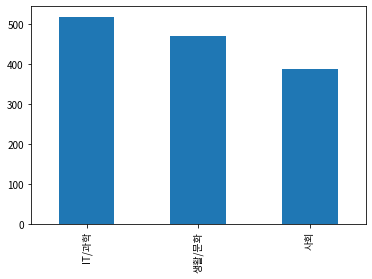

In [10]:
df['code'].value_counts().plot(kind='bar')

In [11]:
# 데이터 실제 갯수 확인
# size() - 각 그룹의 사이즈를 취득할 수 있습니다.
print(df.groupby('code').size().reset_index(name='count'))

    code  count
0  IT/과학    519
1     사회    388
2  생활/문화    470


## 토큰화

* 문자열을 특정다위로 나눈다 --나누는 단위 : 토큰
* 토큰화, 토크나이징(tokinize)

### 단어 토큰화시 고려해야 할 사항
1) 구두점이나 특수 문자를 단순 제외해서는 안 된다.


2) 줄임말과 단어 내에 띄어쓰기가 있는 경우.


In [12]:
# 자바 설치 후 (sudo apt-get install openjdk-8-jdk)
# java -version 확인
# pip3 install JPype1-py3 or pip install JPype1

In [13]:
from konlpy.tag import Komoran

In [14]:
tokenizer = Komoran()

In [15]:
kor_text = '밤에 귀가하던 여성에게 범죄를 시도한 대 남성이 구속됐다서울 제주경찰서는 \
            상해 혐의로 씨를 구속해 수사하고 있다고 일 밝혔다씨는 지난달 일 피해 여성을 \
            인근 지하철 역에서부터 따라가 폭행을 시도하려다가 도망간 혐의를 받는다피해 \
            여성이 저항하자 놀란 씨는 도망갔으며 신고를 받고 주변을 수색하던 경찰에 \
            체포됐다피해 여성은 이 과정에서 경미한 부상을 입은 것으로 전해졌다'

#- 형태소 분석, 즉 토큰화(tokenization)를 합니다.
print(tokenizer.morphs(kor_text))

['밤', '에', '귀가', '하', '던', '여성', '에게', '범죄', '를', '시도', '하', 'ㄴ', '대', '남성', '이', '구속', '되', '었', '다', '서울', '제주', '경찰서', '는', '상해', '혐의', '로', '씨', '를', '구속', '하', '아', '수사', '하', '고', '있', '다고', '일', '밝히', '었', '다', '씨', '는', '지난달', '일', '피해', '여성', '을', '인근', '지하철', '역', '에서부터', '따라가', '아', '폭행', '을', '시도', '하', '려다가', '도망가', 'ㄴ', '혐의', '를', '받', '는다', '피하', '아', '여성', '이', '저항', '하', '자', '놀라', 'ㄴ', '씨', '는', '도망가', '았', '으며', '신고', '를', '받', '고', '주변', '을', '수색', '하', '던', '경찰', '에', '체포', '되', '었', '다', '피하', '아', '여성', '은', '이', '과정', '에서', '경미', '하', 'ㄴ', '부상', '을', '입', '은', '것', '으로', '전하', '아', '지', '었', '다']


## 불용어 제거

* 불필요한 토큰들 제거  
(토큰화과정을 거친결과를 지속 확인하며 계속 추가)

In [16]:
stopwords = ['에','는','은','을','했','에게','있','이','의','하','한','다','과','때문','할','수','무단','따른','및','금지','전재','경향신문','기자','는데','가','등','들','파이낸셜','저작','등','뉴스']

In [17]:
# 토큰화 및 토큰화 과정에서 불용어를 제거하는 함수
def preprocessing(data):
    text_data=[]
    
    for sentence in data:
        temp_data=[]
        # 토큰화
        temp_data = tokenizer.morphs(sentence)
        
        # 불용어 제거
        temp_data = [word for word in temp_data if not word in stopwords]
        text_data.append(temp_data)
        
    text_data = list(map(' '.join, text_data))  #.join -- list to str
    
    return text_data
    

In [20]:
text_data = preprocessing(df['news'][:10])
print(text_data)

['오늘 일밤 시 분 쯤 경기도 화성시 우정읍 우정읍 사무소 인근 왕복 차로 도로 에서 달리 던 경 차 와 톤 트럭 트랙터 서로 부딪히 었 습니다 이사 고로 경차 운전 자와 톤 트럭 운전 자가 다리 와 가슴 등에 통증 호소 해인 근 병원 으로 옮기 어 지 어 치료 를 받 고 습니다 경찰 관계자 달리 던 경 차 앞서 어 던 트랙터 를 뒤 늦 게 발견 고 를 피하 려다 중앙선 넘 어 말 아 주 오 던 트럭 부딪히 고 과정 에서 트랙터 와 도 부딪히 ㄴ 것 으로 보이 ㄴ다고 설명 았 습니다 경찰 은운 전자 상대로 정확 ㄴ 사고 경위 를 조사 고 습니다 사진 출처 시청자 제공 김민혁', '기사 섹션 분류 안내 기사 섹션 정보 해당 언론사 분류 를 따르 고 습니다 언론사 개별 기사 를 개 이상 섹션 으로 중복 분류 ㄹ 습니다 닫 기', '한국경제 조시형 전북 군산 만경강 에서 지나 ㄴ 일 채취 야생 조류 분변 국립 야생동물 질병 관리 원 이중 간 검사 결과 형조 류 인플루엔자 항원 검출 되 었 다고 환경부 일 밝히 었 이번 검출 되 ㄴ 항원 고 병원 성 어 불 일 후 확인 되 ㄴ 환경부 농림 축산 식품 부 질병 관리 청 해당 지자체 관계 기관 에조 류 인플루엔자 바이러스 검출 사실 즉시 통보 해 항원 검출 되 ㄴ 곳 주변 지역 등에 대 해 신속히 방역 조처 를 도록 았 야생 조류 조류 인플루엔자 긴급 행동 지침 따라 이번 형 항원 이나 온 지점 에서 반경 내 지역 에서 야생 조류 분변 채집 나서 한편 조류 폐 사체 등에 대한 예찰 활동 벌이 기로 았 조시형 한국경제 재배 포', '서울 송파구 서울 동부 지검 구 윤 성기 자 서울 송파구 서울 동부 지검 구 윤 성기 자 서울 이상학 윤 대진 법무연수원 부원 장의 친 형 ㄴ 윤 우진 전 용산 세무서 장이 지난 월 변호사법 위 반사 건과 관련 해 참고인 신분 으로 조사 를 받 것 으로 알리 어 지 었 ㄹ 검찰 따르 면서 울 ㄹ 동부 지검 지나 ㄴ 월 윤전 세무서장 변호사법 위 반소 지가 있다 고 판단 해 참고인 신분 으로 부

In [33]:
df.head()

,news,code
0,오늘일밤시분쯤경기도화성시우정읍우정읍사무소인근왕복차로도로에서달리던경차와톤트럭트랙터가서...,사회
1,기사섹션분류안내기사의섹션정보는해당언론사의분류를따르고있습니다언론사는개별기사를개이상섹션...,사회
7,한국경제조시형기자전북군산만경강에서지난일채취한야생조류분변을국립야생동물질병관리원이중간검...,사회
17,서울송파구서울동부지검뉴스구윤성기자서울송파구서울동부지검뉴스구윤성기자서울뉴스이상학기자윤...,사회
19,동영상뉴스앵커핼러윈을맞아서울이태원등번화가에는젊은이들의발길이이어지고있습니다이런가운데전...,사회


# 머신러닝 사용하기

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [41]:
#- 훈련 데이터와 테스트 데이터를 분리합니다.
X_train, X_test, y_train, y_test = train_test_split(text_data, df['code'], random_state = 0)

In [42]:
print('훈련용 뉴스 기사의 개수 :', len(X_train))
print('테스트용 뉴스 기사의 개수 : ', len(X_test))
print('훈련용 레이블의 개수 : ', len(y_train))
print('테스트용 레이블의 개수 : ', len(y_test))

훈련용 뉴스 기사의 개수 : 1032
테스트용 뉴스 기사의 개수 :  345
훈련용 레이블의 개수 :  1032
테스트용 레이블의 개수 :  345


In [ ]:
#- 단어의 수를 카운트하는 사이킷런의 카운트벡터라이저입니다.
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)

#- 카운트벡터라이저의 결과로부터 TF-IDF 결과를 얻습니다.
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [44]:
#- 나이브 베이즈 분류기를 수행합니다.
#- X_train은 TF-IDF 벡터, y_train은 레이블입니다.

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [45]:
# 텍스트를 입력하면 자동으로 TF-IDF벡터로 바꾸는 전처리 함수
# count_vect의 정보가 이미 위에서 저장되있으므로 fit 필요없음??

def tfidf_vectorizer(data):
    data_counts = count_vect.transform(data)
    data_tfidf = tfidf_transformer.transform(data_counts)
    return data_tfidf

In [46]:
# 임의 문장으로 test1
new_sent = preprocessing(["민주당 일각에서 법사위의 체계·자구 심사 기능을 없애야 한다는 \
                           주장이 나오는 데 대해 “체계·자구 심사가 법안 지연의 수단으로 \
                          쓰이는 것은 바람직하지 않다”면서도 “국회를 통과하는 법안 중 위헌\
                          법률이 1년에 10건 넘게 나온다. 그런데 체계·자구 심사까지 없애면 매우 위험하다”고 반박했다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


In [47]:
# test2
new_sent = preprocessing(["인도 로맨틱 코미디 영화 <까립까립 싱글>(2017)을 봤을 때 나는 두 눈을 의심했다. \
                          저 사람이 남자 주인공이라고? 노안에 가까운 이목구비와 기름때로 뭉친 파마머리와, \
                          대충 툭툭 던지는 말투 등 전혀 로맨틱하지 않은 외모였다. 반감이 일면서 \
                          ‘난 외모지상주의자가 아니다’라고 자부했던 나에 대해 회의가 들었다.\
                           티브이를 꺼버릴까? 다른 걸 볼까? 그런데, 이상하다. 왜 이렇게 매력 있지? 개구리와\
                            같이 툭 불거진 눈망울 안에는 어떤 인도 배우에게서도 느끼지 못한 \
                            부드러움과 선량함, 무엇보다 슬픔이 있었다. 2시간 뒤 영화가 끝나고 나는 완전히 이 배우에게 빠졌다"])
print(clf.predict(tfidf_vectorizer(new_sent)))

['생활/문화']


In [48]:
# test3
new_sent = preprocessing(["20분기 연속으로 적자에 시달리는 LG전자가 브랜드 이름부터 성능, 디자인까지 대대적인 변화를 \
                          적용한 LG 벨벳은 등장 전부터 온라인 커뮤니티를 뜨겁게 달궜다. 사용자들은 “디자인이 예쁘다”, \
                          “슬림하다”는 반응을 보이며 LG 벨벳에 대한 기대감을 드러냈다."])
print(clf.predict(tfidf_vectorizer(new_sent)))

['IT/과학']


* 테스트 데이터에 적용

In [49]:
y_pred = clf.predict(tfidf_vectorizer(X_test))
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       IT/과학       0.54      1.00      0.70       129
          사회       0.82      0.54      0.65        93
       생활/문화       0.82      0.30      0.44       123

    accuracy                           0.63       345
   macro avg       0.73      0.61      0.60       345
weighted avg       0.72      0.63      0.59       345

